## Questions
<li><a href=#1.-Which-neighbourhood-of-boston-has-more-listings?-What-type-of-properties-provided-there?>1. Which neighbourhood of boston has more listings? What type of properties provided there?</a></li>
<li><a href=#2.-What-is-the-availability-of-the-listings-across-each-neighbourhood-and-their-review/reponsiveness-?>2. What is the availability of the listings across each neighbourhood and their review/reponsiveness ?</a></li>
<li><a href=#3.-What-is-the-price-trend-among-the-neighbourhood-throughout-the-year?what-is-the-weekend-price-trend?>3. What is the price trend among the neighbourhood throughout the year?what is the weekend price trend?</a></li>
<li><a href=#4.-Which-amenities,-in-general-can-you-expect-and-what-are-some-of-rare-ammenties-and-how-much-extra-you-have-to-pay-to-get-those?>4. Which amenities, in general can you expect and what are some of rare ammenties and how much extra you have to pay to get those?</a></li>
<li><a href=#5.-Which-neighbourhood-is-seeing-surge-in-listings?>5. Which neighbourhood is seeing surge in listings?</a></li>



## Reading the data

In [1]:
# data from http://insideairbnb.com/get-the-data.html
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import json
sns.set(rc={'figure.figsize':(11, 4)})

calendar = pd.read_csv('data/calendar.csv', index_col='date', parse_dates=True)
listings = pd.read_csv('./data/listings.csv', parse_dates=True)
reviews = pd.read_csv('./data/reviews.csv', parse_dates=True)

## Data Understanding and processing

In [2]:
listings['price'] = listings['price'].str[1:].str.split(',').str.join('').astype(float)
listings['amenities'] = listings['amenities'].map( lambda x : [elem.strip('""') for elem in x.strip('{}').split(',')])

In [3]:
calendar['Year'] = calendar.index.year
calendar['Month'] = calendar.index.month
calendar['month_name'] = calendar.index.month_name()
calendar['Weekday Name'] = calendar.index.weekday_name
calendar['Weekday No'] = calendar.index.weekday
calendar['weekofyear'] = calendar.index.weekofyear
calendar['price'] = calendar['price'].str[1:].str.split(',').str.join('').astype(float)
calendar['price_available'] = ~calendar.price.isnull()
calendar.head()

listing_id available  price  Year  Month month_name Weekday Name  \
date                                                                           
2017-09-05    12147973         f    NaN  2017      9  September      Tuesday   
2017-09-04    12147973         f    NaN  2017      9  September       Monday   
2017-09-03    12147973         f    NaN  2017      9  September       Sunday   
2017-09-02    12147973         f    NaN  2017      9  September     Saturday   
2017-09-01    12147973         f    NaN  2017      9  September       Friday   

            Weekday No  weekofyear  price_available  
date                                                 
2017-09-05           1          36            False  
2017-09-04           0          36            False  
2017-09-03           6          35            False  
2017-09-02           5          35            False  
2017-09-01           4          35            False

In [4]:
reviews.head()

listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   
2     1178162  5003196  2013-06-06      6449554     Sebastian   
3     1178162  5150351  2013-06-15      2215611        Marine   
4     1178162  5171140  2013-06-16      6848427        Andrew   

                                            comments  
0  My stay at islam's place was really cool! Good...  
1  Great location for both airport and city - gre...  
2  We really enjoyed our stay at Islams house. Fr...  
3  The room was nice and clean and so were the co...  
4  Great location. Just 5 mins walk from the Airp...

In [5]:
pd.set_option('display.max_colwidth', 10)
listings.head()

id listing_url  scrape_id last_scraped       name    summary  \
0  12147973  https:...   201609...  2016-0...    Sunny ...  Cozy, ...   
1   3075044  https:...   201609...  2016-0...    Charmi...  Charmi...   
2      6976  https:...   201609...  2016-0...    Mexica...  Come s...   
3   1436513  https:...   201609...  2016-0...    Spacio...  Come e...   
4   7651065  https:...   201609...  2016-0...    Come H...  My com...   

       space description experiences_offered neighborhood_overview  ...  \
0  The ho...  Cozy, ...        none           Roslin...             ...   
1  Small ...  Charmi...        none           The ro...             ...   
2  Come s...  Come s...        none           The LO...             ...   
3  Most p...  Come e...        none           Roslin...             ...   
4  Clean,...  My com...        none           I love...             ...   

  review_scores_value requires_license license jurisdiction_names  \
0        NaN                   f           NaN        NaN           
1        9.0                   f           NaN        NaN           
2       10.0                   f           NaN        NaN           
3       10.0                   f           NaN        NaN           
4       10.0                   f           NaN        NaN           

  instant_bookable cancellation_policy require_guest_profile_picture  \
0          f         moderate                   f                      
1          t         moderate                   f                      
2          f         moderate                   t                      
3          f         moderate                   f                      
4          f         flexible                   f                      

  require_guest_phone_verification calculated_host_listings_count  \
0          f                                1                       
1          f                                1                       
2          f                                1                       
3          f                                1                       
4          f                                1                       

   reviews_per_month  
0        NaN          
1       1.30          
2       0.47          
3       1.00          
4       2.25          

[5 rows x 95 columns]

## 1. Which neighbourhood of boston has more listings? What type of properties provided there?

In [6]:
m = folium.Map(location=[42.33, -71.07], zoom_start=11.5)

df = listings.groupby(['neighbourhood_cleansed']).id.count().reset_index()
df.columns = ['neighbourhood', 'listings_count']


with open('data/neighbourhoods.geojson') as boston_json:
    b_json = json.load(boston_json)

folium.Choropleth(geo_data=b_json, 
                  name='choropleth', 
                  data=df, 
                  columns=['neighbourhood','listings_count'],
                  fill_color='YlOrRd',
                  key_on ='properties.neighbourhood',
                  fill_opacity=0.6,
                  line_opacity=0.2,
                  legend_name =  'listings count'
                 ).add_to(m)


colors = {
    "Entire home/apt" : "blue",
    "Private room" : "green",
    "Shared room" : "red"
}
listings['room_type_color'] = listings['room_type'].apply(lambda x: colors[x])

# m = folium.Map(location=[42.33, -71.07], zoom_start=11.5)

listings.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]], 
                                              radius=1, color=row['room_type_color'], popup=row['neighbourhood'])
                                             .add_to(m), axis=1)



m

In [7]:
pd.set_option('display.max_colwidth', 50)
df.sort_values("listings_count", ascending = False)

neighbourhood  listings_count
12            Jamaica Plain             343
22                South End             326
1                  Back Bay             302
10                   Fenway             290
7                Dorchester             269
0                   Allston             260
3               Beacon Hill             194
4                  Brighton             185
20             South Boston             174
8                  Downtown             172
9               East Boston             150
19                  Roxbury             144
17                North End             143
16             Mission Hill             124
5               Charlestown             111
21  South Boston Waterfront              83
6                 Chinatown              71
18               Roslindale              56
23                 West End              49
24             West Roxbury              46
11                Hyde Park              31
2               Bay Village              24
15                 Mattapan              24
14    Longwood Medical Area               9
13         Leather District               5

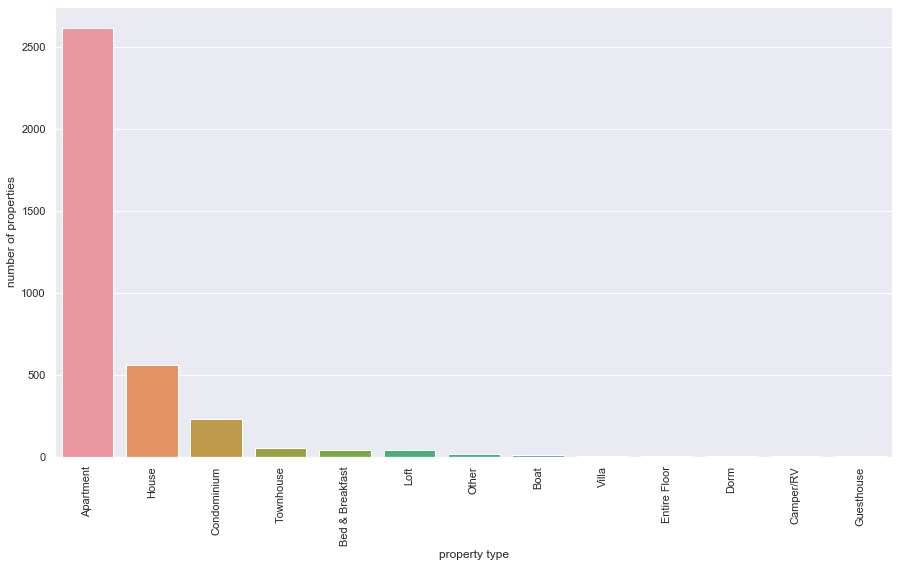

In [8]:
import matplotlib.pyplot as plt
data = listings.groupby(['property_type']).id.count().reset_index()
sns.set(rc={'figure.figsize':(15,8.27)})
data.columns = ['property type', 'number of properties']
data = data.sort_values('number of properties', ascending=False)
g = sns.barplot(data=data, x='property type', y='number of properties')
plt.xticks(rotation=90)
plt.show()

In [9]:
listings.groupby('room_type').id.count()

room_type
Entire home/apt    2127
Private room       1378
Shared room          80
Name: id, dtype: int64

## 2. What is the availability of the listings across each neighbourhood and their review/reponsiveness ?

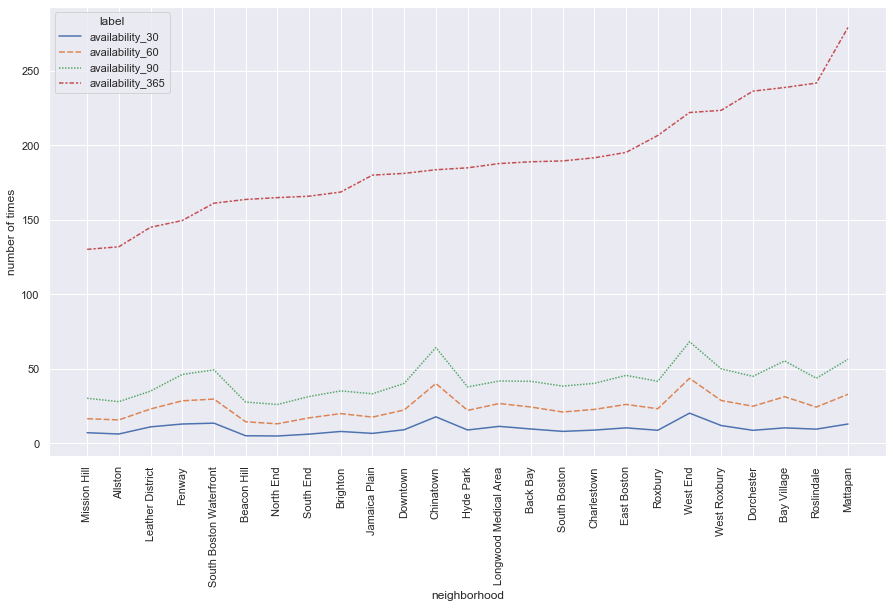

In [10]:
import matplotlib.pyplot as plt
df = listings.groupby(['neighbourhood_cleansed']).agg({'availability_30':'mean', 'availability_60':'mean', 'availability_90':'mean', 'availability_365':'mean'}).sort_values('availability_365').reset_index()
sns.set(rc={'figure.figsize':(15,8.27)})
data = pd.melt(df, ['neighbourhood_cleansed'])
data.columns = ['neighborhood', 'label', 'number of times']
g = sns.lineplot(data=data, x='neighborhood', y='number of times', hue='label', style='label')
plt.xticks(rotation=90)
plt.show()

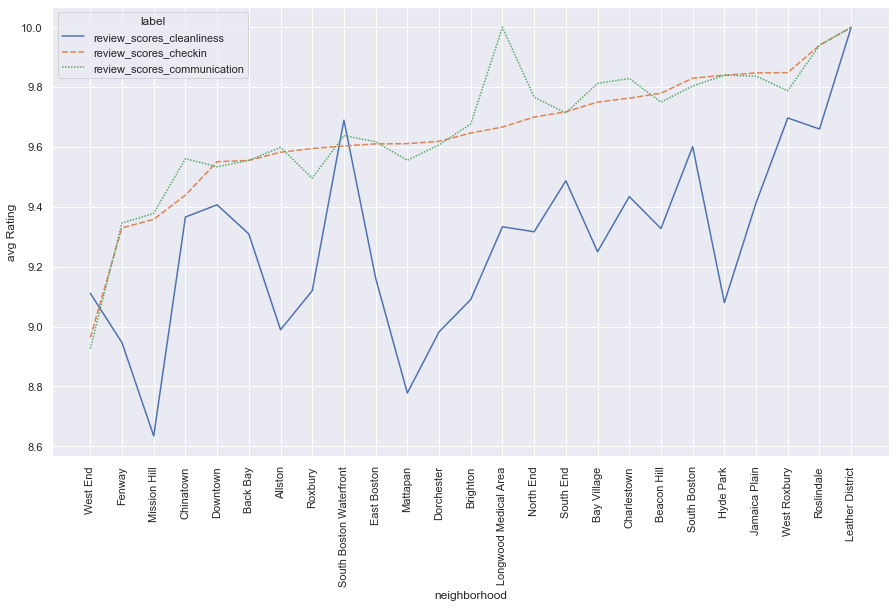

In [11]:
import matplotlib.pyplot as plt
# 'review_scores_location':'mean',
df = listings.groupby('neighbourhood_cleansed').agg({'review_scores_cleanliness':'mean',
       'review_scores_checkin':'mean', 'review_scores_communication':'mean',
        'review_scores_rating':'mean'})\
        .sort_values('review_scores_checkin').drop('review_scores_rating', axis=1).reset_index()
sns.set(rc={'figure.figsize':(15,8.27)})
data = pd.melt(df, ['neighbourhood_cleansed'])
data.columns = ['neighborhood', 'label', 'avg Rating']

g = sns.lineplot(data=data, x='neighborhood', y='avg Rating', hue='label', style='label')
plt.xticks(rotation=90)
plt.show()

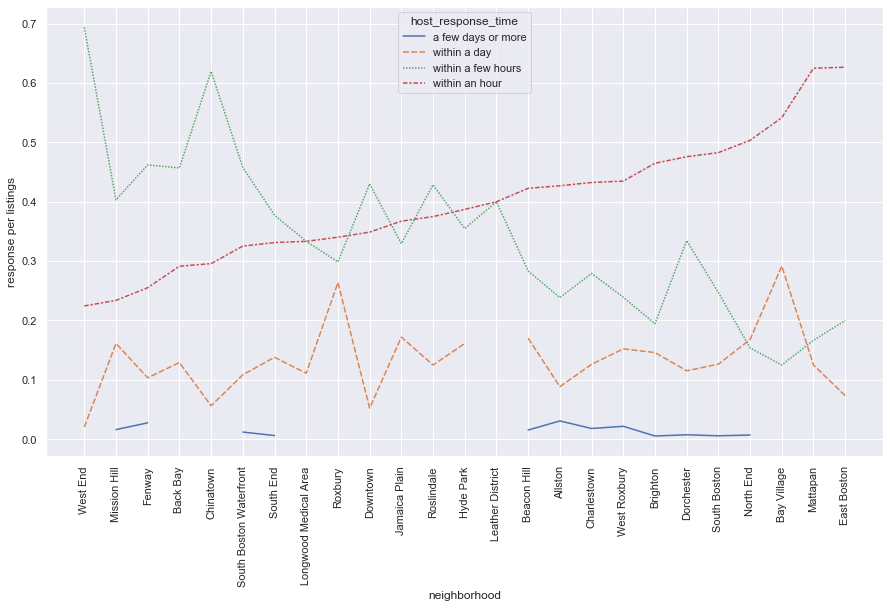

neighborhood  host_response_time  response per listings
0       West End  a few days or more                    NaN
1   Mission Hill  a few days or more               0.016129
2         Fenway  a few days or more               0.027586
3       Back Bay  a few days or more                    NaN
4      Chinatown  a few days or more                    NaN
..           ...                 ...                    ...
95  South Boston      within an hour               0.482759
96     North End      within an hour               0.503497
97   Bay Village      within an hour               0.541667
98      Mattapan      within an hour               0.625000
99   East Boston      within an hour               0.626667

[100 rows x 3 columns]

In [12]:
import matplotlib.pyplot as plt
df = listings.groupby(['neighbourhood_cleansed', 'host_response_time']).agg({'id':'count'}).sort_values(['host_response_time','id']).reset_index()
sns.set(rc={'figure.figsize':(15,8.27)})
df.columns = ['neighborhood', 'host_response_time', 'count']
df2= listings.groupby('neighbourhood_cleansed').id.count().reset_index()
df2.columns = ['neighborhood', 'listings count']
df = pd.merge(df, df2, on='neighborhood')
df['response per listings'] = df['count'] / df['listings count'] 


df = pd.pivot_table(df, values='response per listings', index=['neighborhood'], columns=['host_response_time']).sort_values('within an hour')
df = pd.melt(df.reset_index(), id_vars=['neighborhood'], value_vars=['a few days or more', 'within a day', 'within a few hours', 'within an hour'])
df.columns = ['neighborhood', 'host_response_time', 'response per listings']

g = sns.lineplot(data=df, x='neighborhood', y='response per listings', hue='host_response_time', style='host_response_time')
plt.xticks(rotation=90)
plt.show()

df

## 3. What is the price trend among the neighbourhood throughout the year?what is the weekend price trend?

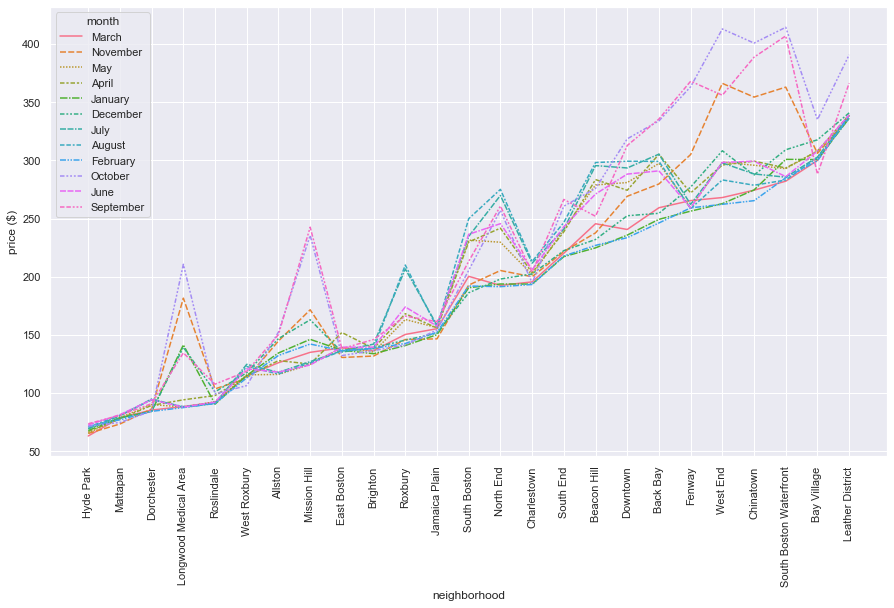

In [15]:
import matplotlib.pyplot as plt

df = pd.merge(listings[['id', 'neighbourhood_cleansed']], calendar[calendar['available']=='t'][['listing_id', 'price', 'month_name']], left_on='id', right_on='listing_id')
df = df.groupby(['neighbourhood_cleansed', 'month_name']).agg({'price':'mean'}).sort_values('price').reset_index()
sns.set(rc={'figure.figsize':(15,8.27)})
df.columns = ['neighborhood', 'month', 'price ($)']
g = sns.lineplot(data=df, x='neighborhood', y='price ($)', hue='month', style="month")
plt.xticks(rotation=90)
plt.show()


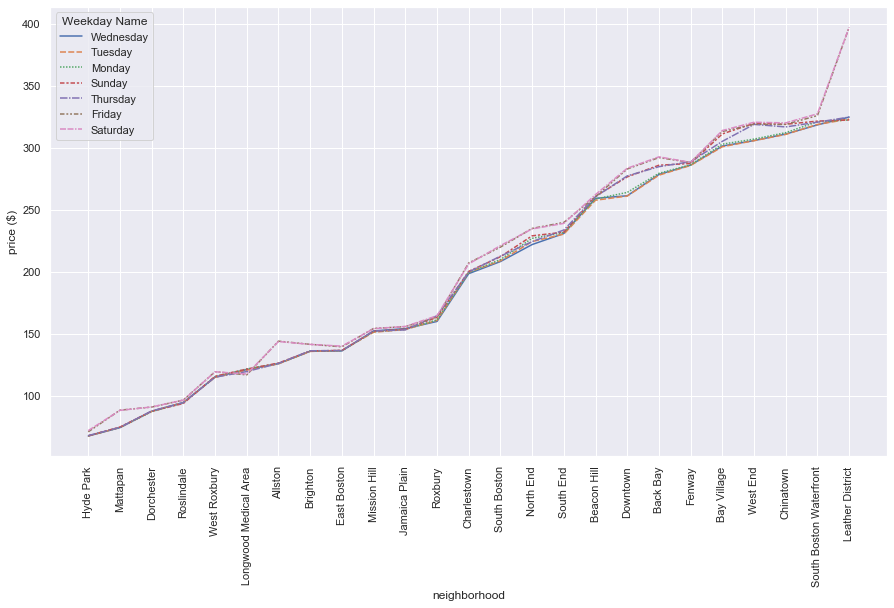

In [16]:
import matplotlib.pyplot as plt
df = pd.merge(listings[['id', 'neighbourhood_cleansed']], calendar[calendar['available']=='t'][['listing_id', 'price', 'Weekday Name']], left_on='id', right_on='listing_id')
df = df.groupby(['neighbourhood_cleansed', 'Weekday Name']).agg({'price':'mean'}).sort_values('price').reset_index()
sns.set(rc={'figure.figsize':(15,8.27)})
df.columns = ['neighborhood', 'Weekday Name', 'price ($)']
g = sns.lineplot(data=df, x='neighborhood', y='price ($)', hue='Weekday Name', style="Weekday Name")
plt.xticks(rotation=90)
plt.show()

(190, 205)

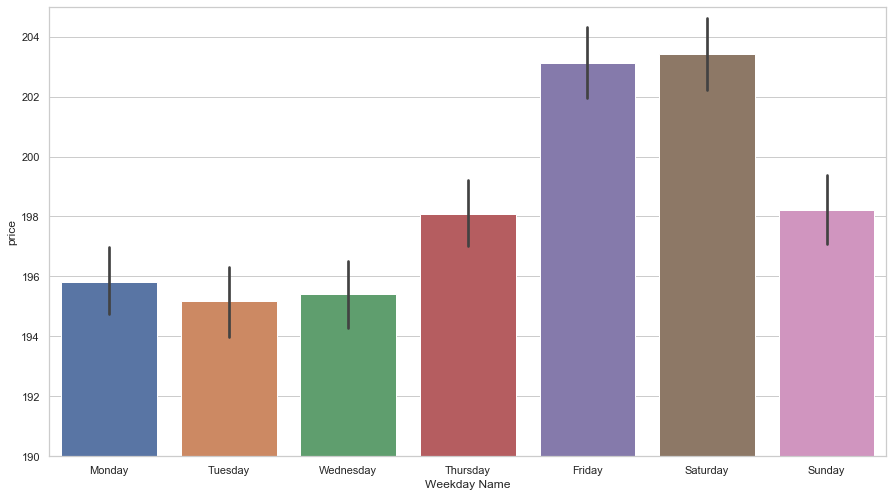

In [17]:
import seaborn as sns
#df = calendar.groupby('Weekday No')['adjusted_price']
# give proper title and labels
available = calendar[calendar['available']=='t']
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Weekday Name", y="price", data=available.sort_values("Weekday No"))
ax.set_ylim(190,205)

### How are different types of room priced in boston?

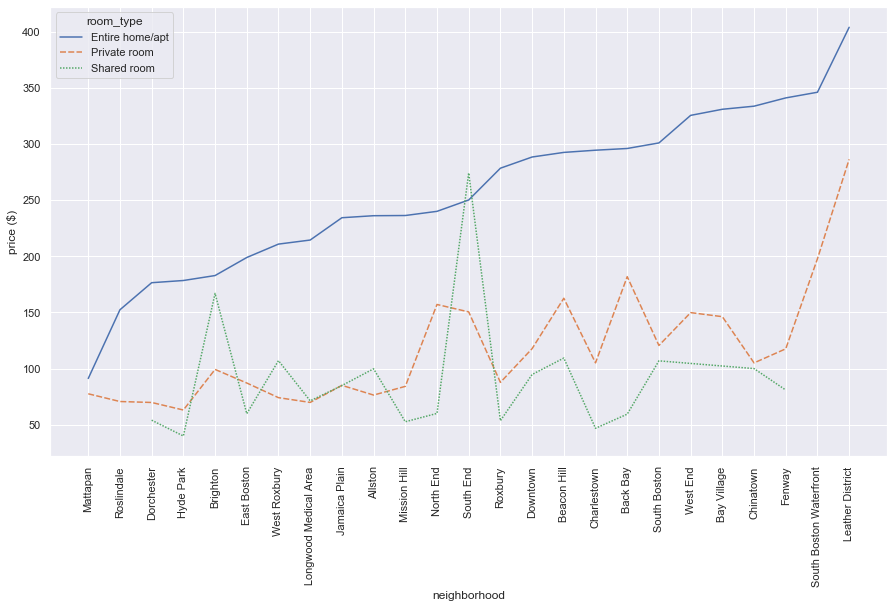

In [18]:
import matplotlib.pyplot as plt
df = pd.merge(listings[['id', 'neighbourhood_cleansed', 'room_type']], calendar[calendar['available']=='t'][['listing_id', 'price']], left_on='id', right_on='listing_id')
df = df.groupby(['neighbourhood_cleansed', 'room_type']).agg({'price':'mean'}).sort_values(['room_type','price']).reset_index()
sns.set(rc={'figure.figsize':(15,8.27)})
df.columns = ['neighborhood', 'room_type', 'price ($)']
g = sns.lineplot(data=df, x='neighborhood', y='price ($)', hue='room_type', style='room_type')
plt.xticks(rotation=90)
plt.show()


## 4. Which amenities, in general can you expect and what are some of rare ammenties and how much extra you have to pay to get those?

In [19]:
import numpy as np
df = listings[['room_type', 'amenities']].explode('amenities')
df['count'] = 1
df = pd.pivot_table(df, values='count', index=['amenities'], columns=['room_type'], aggfunc={'count':np.sum}).sort_values('Entire home/apt', ascending=False)

df = (df/listings.groupby('room_type').id.count()).sort_values(['Entire home/apt', 'Private room', 'Shared room'], ascending=False)
df = df[df.index != '']
df.head(10)

room_type          Entire home/apt  Private room  Shared room
amenities                                                    
Kitchen                   0.975082      0.829463       0.8375
Heating                   0.966620      0.915094       0.8375
Wireless Internet         0.961918      0.947750       0.8625
Air Conditioning          0.878232      0.656023       0.6125
TV                        0.869299      0.519594       0.5250
Essentials                0.858016      0.806967       0.7125
Smoke Detector            0.806300      0.827286       0.7000
Internet                  0.780442      0.635704       0.5125
Dryer                     0.724024      0.640784       0.6625
Washer                    0.723084      0.641509       0.6625

In [20]:
df.shape

(45, 3)

In [21]:
df.tail(10)

room_type                  Entire home/apt  Private room  Shared room
amenities                                                            
Lock on Bedroom Door              0.048895      0.266328       0.0375
Dog(s)                            0.046074      0.094340       0.0125
Suitable for Events               0.034791      0.040639       0.1000
Hot Tub                           0.024918      0.078374       0.0750
Cat(s)                            0.024448      0.089260       0.0750
Smoking Allowed                   0.010343      0.047170       0.1000
Other pet(s)                      0.002821      0.007257          NaN
Paid Parking Off Premises         0.001881           NaN          NaN
Free Parking on Street            0.000940      0.004354       0.0125
Washer / Dryer                    0.000940           NaN          NaN

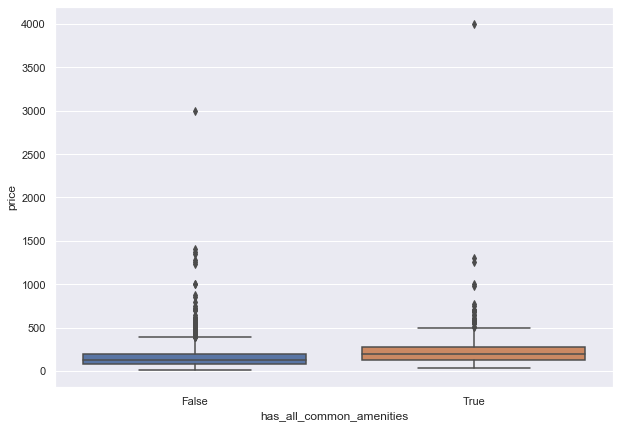

In [22]:
normal_amenities = set(df.head(10).index.values)
listings['has_all_common_amenities'] = listings.amenities.apply(lambda x: len(normal_amenities - set(x)) == 0)
# df = listings.groupby('normal_amenities').price.mean()
sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(x="has_all_common_amenities", y="price", data=listings)

In [23]:
listings.groupby('has_all_common_amenities').price.mean().reset_index()

has_all_common_amenities       price
0                     False  156.089293
1                      True  220.161323

## 5. Which neighbourhood is seeing surge in listings?

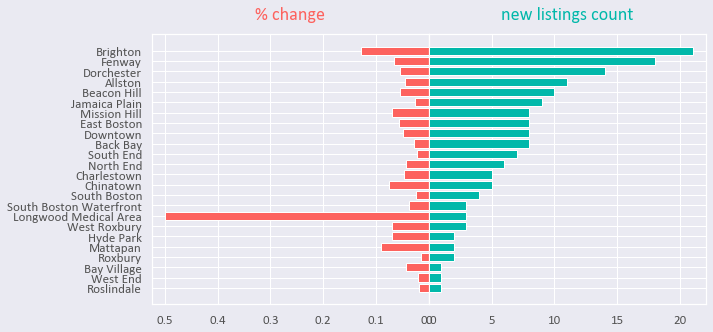

neighbourhood  new_listings_count  old_listings_count  \
4                  Brighton                  21                 164   
10                   Fenway                  18                 272   
7                Dorchester                  14                 255   
0                   Allston                  11                 249   
3               Beacon Hill                  10                 184   
12            Jamaica Plain                   9                 334   
15             Mission Hill                   8                 116   
9               East Boston                   8                 142   
8                  Downtown                   8                 164   
1                  Back Bay                   8                 294   
21                South End                   7                 319   
16                North End                   6                 137   
5               Charlestown                   5                 106   
6                 Chinatown                   5                  66   
19             South Boston                   4                 170   
20  South Boston Waterfront                   3                  80   
13    Longwood Medical Area                   3                   6   
23             West Roxbury                   3                  43   
11                Hyde Park                   2                  29   
14                 Mattapan                   2                  22   
18                  Roxbury                   2                 142   
2               Bay Village                   1                  23   
22                 West End                   1                  48   
17               Roslindale                   1                  55   

    percentage  
4     0.128049  
10    0.066176  
7     0.054902  
0     0.044177  
3     0.054348  
12    0.026946  
15    0.068966  
9     0.056338  
8     0.048780  
1     0.027211  
21    0.021944  
16    0.043796  
5     0.047170  
6     0.075758  
19    0.023529  
20    0.037500  
13    0.500000  
23    0.069767  
11    0.068966  
14    0.090909  
18    0.014085  
2     0.043478  
22    0.020833  
17    0.018182

In [24]:
days_old = 90
listings['host_since'] = pd.to_datetime(listings['host_since'])
max_host = listings['host_since'].max()
listings['host_since(days)'] = (max_host - listings['host_since']).dt.days
df = listings[listings['host_since(days)']<days_old].groupby(['neighbourhood_cleansed']).id.count().reset_index()
sns.set(rc={'figure.figsize':(15,8.27)})
df.columns = ['neighbourhood', 'new_listings_count']
df2 = listings[listings['host_since(days)']>=days_old].groupby(['neighbourhood_cleansed']).id.count().reset_index()
df2.columns = ['neighbourhood', 'old_listings_count']

df = pd.merge(df, df2, on="neighbourhood")
df['percentage'] = df['new_listings_count']/df['old_listings_count']
df =  df.sort_values('percentage', ascending=False)
df = df.sort_values('new_listings_count', ascending=False)

font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = df.neighbourhood
column0 = df['percentage']
column1 = df['new_listings_count']
title0 = '% change'
title1 = 'new listings count'


fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

        
axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)
    
        
# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 

# To show data from highest to lowest
plt.gca().invert_yaxis()
for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
plt.show()
df

### what is the room type are newly listed?

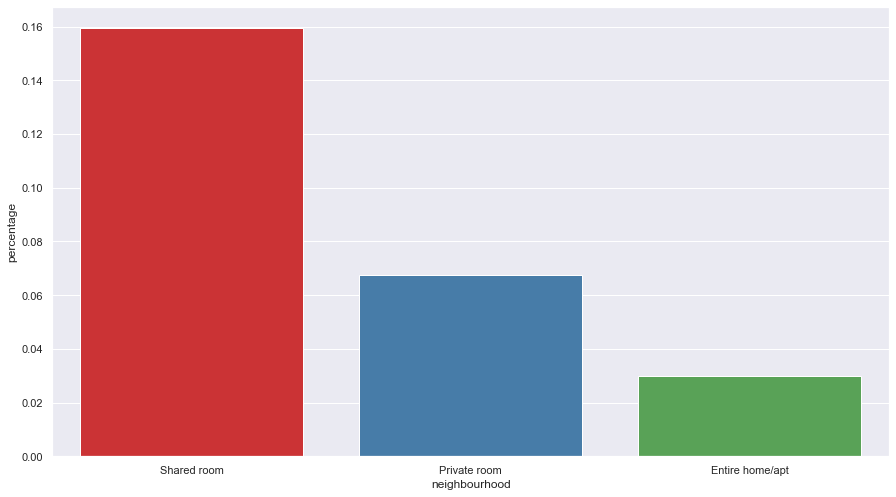

neighbourhood  new_rooms  all_rooms  percentage
2      Shared room         11         69    0.159420
1     Private room         87       1291    0.067390
0  Entire home/apt         62       2065    0.030024

In [25]:
#recent
days_old = 90
listings['host_since'] = pd.to_datetime(listings['host_since'])
max_host = listings['host_since'].max()
listings['host_since(days)'] = (max_host - listings['host_since']).dt.days
df = listings[listings['host_since(days)']<days_old].groupby(['room_type']).id.count().reset_index()
df.columns = ['neighbourhood', 'new_rooms']

#overall
df2 = listings[listings['host_since(days)']>=days_old].groupby(['room_type']).id.count().reset_index()
sns.set(rc={'figure.figsize':(15,8.27)})
df2.columns = ['neighbourhood', 'all_rooms']

df = pd.merge(df, df2, on="neighbourhood")
df['percentage'] = df['new_rooms']/df['all_rooms']
df =  df.sort_values('percentage', ascending=False)

g = sns.barplot(data=df, x='neighbourhood', y='percentage', palette="Set1")

sns.set(rc={'figure.figsize':(15,8.27)})
# plt.xticks(rotation=45)
plt.show()
df